### Final: due 12:00 nootime, Thursday, Jan 13, 2022

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Final (e.g., b88501045-Final), put this Jupyter notebook and all output files into this folder and compress this folder to a .zip file (e.g., b88501045-Final.zip).
### - Submit the Final directly through the NTU COOL course website.

## A tropical cyclone is a rotating, organized system of clouds and thunderstorms that originates over tropical or subtropical waters and has a closed low-level circulation. As quoted by WMO (World Meteorological Organization):

## _Tropical Cyclone (TC) are one of the biggest threats to life and property even in the formative stages of their development. They include a number of different hazards that can individually cause significant impacts on life and property, such as storm surge, flooding, extreme winds, tornadoes and lighting._

## Mexico (MX) country is located between Atlantics and East Pacific. Every year, MX suffers from TCs and the financial and societal losses resulting from them. 

## In this final project, your task is to analyse TCs and MX's rainfall monitoring network. Specific analyses you are required to do include:

### Q1. (35%) Characterising the rain gauge network covered the entire MX
### Q2. (25%) Analysing historical records of TC tracks for the period 1979 - 2019
### Q3. (40%) Identifying those _hotspot_ states prone to be impacted by TCs, and perfoming structural analysis on rainfall data of a given state for a given TC event 
### Q4. (10% bonus) download satellite data and make some plots 


### Import essential modules here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import gstools as gs

### Q1. (35%) Characterising the rain gauge network covered the entire MX.

### From the enclosed csv file _MX_RG_Stns_xy_, you can find the name, ID, coordinates (X and Y)

#### Q1.1 (5%) Import _MX_RG_Stns_xy.csv_ file for the name, ID, coordinates (X and Y in metres) of all gauge stations, as well as the States and Cities these stations belonging to.

#### *Hint: pandas by default would make ID column 'integer type', but it is better if you convert it into 'string type'. This conversion will make your following analyses easier.

In [2]:
fn_data = "/Users/lintingxuan/Final/Files/MX_RG_Stns_xy.csv"
# read csv file, a dataframe will be created to store data
gauge = pd.read_csv(fn_data)
gauge

,ID,StationName,Y,X,State,City,Elevation
0,1001,AGUASCALIENTES (OBS),2.470087e+06,1.092654e+06,AGUASCALIENTES,AGUASCALIENTES,1890.8
1,1003,CALVILLO (SMN),2.426080e+06,1.096451e+06,AGUASCALIENTES,CALVILLO,1640.0
2,1004,CAÑADA HONDA,2.479567e+06,1.109225e+06,AGUASCALIENTES,AGUASCALIENTES,1925.0
3,1005,PRESA EL NIAGARA,2.461754e+06,1.084992e+06,AGUASCALIENTES,AGUASCALIENTES,1844.0
4,1006,EL TULE (SMN),2.490617e+06,1.118118e+06,AGUASCALIENTES,ASIENTOS,1960.0
...,...,...,...,...,...,...,...
5462,32186,EL SALADILLO,2.495826e+06,1.183261e+06,ZACATECAS,GENERAL PANFILO NATERA,2046.0
5463,32187,ESPIRITU SANTO,2.557414e+06,1.175815e+06,ZACATECAS,PINOS,2007.0
5464,32188,EL NIGROMANTE,2.530073e+06,1.125980e+06,ZACATECAS,PINOS,2219.0
5465,32189,PRESA SANTA TERESA,2.346965e+06,1.146605e+06,ZACATECAS,MONTE ESCOBEDO,1980.0


#### Q1.2 (2%) Please calculate and print out how many gauges there are in this network?

In [3]:
IDss= gauge['ID'].tolist()
IDs=[]
for i in IDss:
    if i not in IDs:
        IDs.append('%08d'%i)
num_ID=len(IDs)
print(num_ID)


5467


#### Q1.3 (4%) Please calculate and print out how many states and cities are minitored by this gauge network?

In [4]:
Statess= gauge['State'].tolist()
States=[]
for i in Statess:
    if i not in States:
        States.append(i)
num_state=len(States)
print("State:",num_state)

Cityss= gauge['City'].tolist()
Citys=[]
for i in Cityss:
    if i not in Citys:
        Citys.append(i)
num_city=len(Citys)
print("City:",num_city)

State: 32
City: 1599


#### Q1.4 (2%) Please make a _horizontal bar_ chart summarising the the number of gauges in each state, where the y-axis is the name of each state and the bar width represents the number of gauges. 

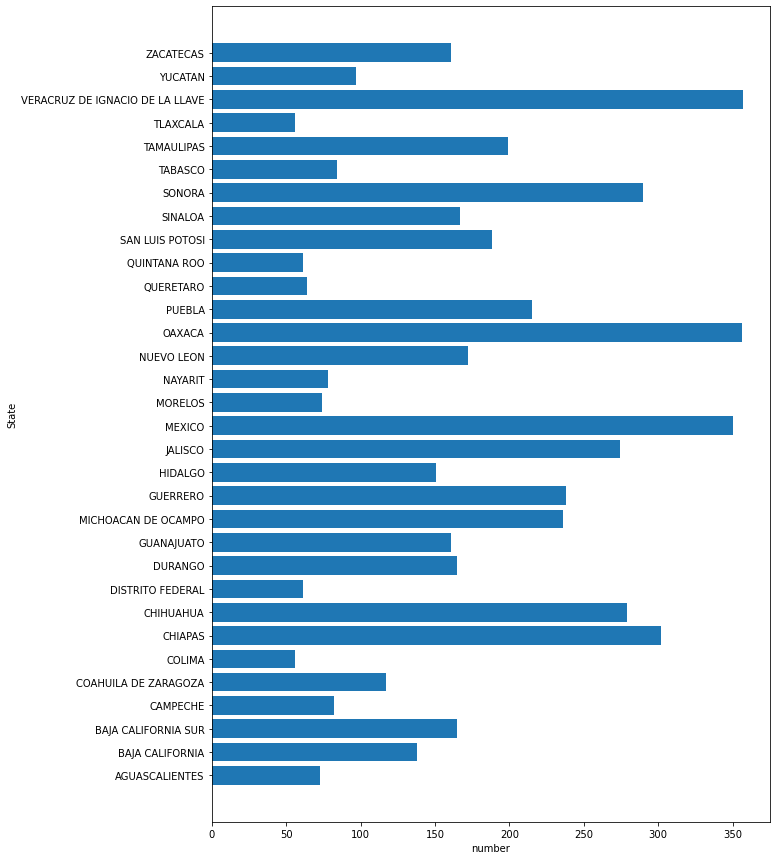

<Figure size 432x288 with 0 Axes>

In [5]:
num=[]
for i in States:
    num.append(len(gauge[gauge['State']==i]))


plt.figure(figsize=(10,15))
plt.barh(States,num, orientation='horizontal')
plt.ylabel('State')
plt.xlabel('number')
plt.figure();

#### Q1.5 (7%) What is the average number of gauges in each state, and which state has the highest number of gauges and how many gauges are there? 

In [6]:
print('Average:',sum(num)/len(num))
max_num=0
for i in range(len(num)):
    if num[i]==max(num):
        max_num=i
        print('State:',States[i],',Max:',num[i])

Average: 170.84375
State: VERACRUZ DE IGNACIO DE LA LLAVE ,Max: 357


#### Q1.6 (9%) What is the maximum, minimum and average distance (in km) between any two gauges in the state with the highest number of gauges?

In [7]:
x=gauge[gauge['State']==States[max_num]]['X'].tolist()
y=gauge[gauge['State']==States[max_num]]['Y'].tolist()
distance=[]
for i in range(len(x)):
    for j in range(0,i-1):
        distance.append(((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5/1000)
print('Average:',sum(distance)/len(distance))
print('Max:',max(distance))
print('Min:',min(distance))



Average: 218.19303224689997
Max: 714.9738825601843
Min: 0.23256784754093096


#### Q1.7 (6%) Please find a suitable probability distribution to fit distances between any two gauges in the state with the highest number of gauges, and plot the histogram of the these distances and the fitted probability distribution in a single plot to confirm your fitting result.

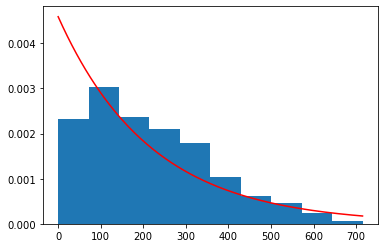

<Figure size 432x288 with 0 Axes>

In [8]:
from scipy.stats import expon
result = expon.fit(distance)
x = np.linspace (min(distance),max(distance), 200) 
y = stats.expon.pdf(x, result[0], result[1])

plt.figure()
plt.hist(distance,density=True, histtype='stepfilled')
plt.plot(x,y, "r-")
plt.figure();

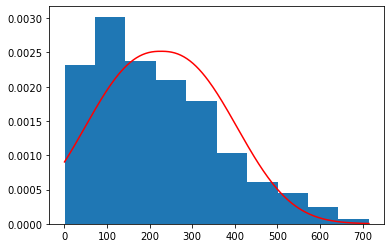

<Figure size 432x288 with 0 Axes>

In [9]:
from scipy.stats import gennorm
result = gennorm.fit(distance)
x = np.linspace (min(distance),max(distance), 200) 
y = stats.gennorm.pdf(x, result[0], result[1],result[2])

plt.figure()
plt.hist(distance,density=True, histtype='stepfilled')
plt.plot(x,y, "r-")
plt.figure();

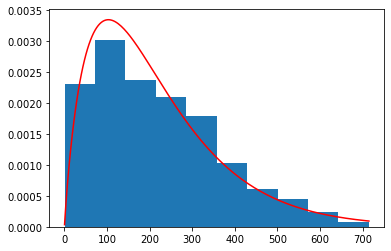

<Figure size 432x288 with 0 Axes>

In [10]:
from scipy.stats import gamma
# shape(alpha), location, scale(beta)
result = gamma.fit(distance, floc = 0.0)

x = np.linspace (min(distance),max(distance), 200) 
y = stats.gamma.pdf(x, a=result[0], scale=result[2])

plt.figure()
plt.hist(distance,density=True, histtype='stepfilled')
plt.plot(x,y, "r-")
plt.figure();


In [11]:
print('Gamma Distribution')
print("alpha =",result[0])
print("beta =",result[2])

Gamma Distribution
alpha = 1.8973973103885693
beta = 114.99596370894754


### Q2. (25%) Analysing historical records of TC tracks for the period 1979 - 2019

#### Q2.1 (2%) Import _NHC_TC_1979-2019_(0_34,-120_-55)_xy.csv_ file for records of TC tracks passing by Atlantic and East Pacific oceans. Each row of the file represents a track, and you can find:

##### - the 'order' of this track; 
##### - Which 'Ocean' this track come from?
##### - The registered 'Datetime' of this track;
##### - The 'name' and 'Record identifier' of the TC that this track belonged to;
##### - The registered 'X' and 'Y' coordinates (in metres);
##### - Some physical properties: Max sustained wind speed (kt)	and Min pressure (millibars)

In [12]:
fn_data = "/Users/lintingxuan/Final/Files/NHC_TC_1979-2019_(0_34,-120_-55)_xy.csv"
# read csv file, a dataframe will be created to store data
TC_track = pd.read_csv(fn_data)
TC_track['Datetime'] = pd.to_datetime(TC_track['Datetime'], format='%d/%m/%Y %H:%M')
TC_track

,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
0,34794,Atlantic,AL011979,1979-06-11 12:00:00,UNNAMED,4.713328e+06,762965.651712,20,-999
1,34795,Atlantic,AL011979,1979-06-11 18:00:00,UNNAMED,4.739978e+06,800466.013308,25,-999
2,34796,Atlantic,AL011979,1979-06-12 00:00:00,UNNAMED,4.796193e+06,853699.561234,25,-999
3,34797,Atlantic,AL011979,1979-06-12 06:00:00,UNNAMED,4.822453e+06,891305.530643,25,-999
4,34798,Atlantic,AL011979,1979-06-12 12:00:00,UNNAMED,4.843414e+06,961673.788237,25,-999
...,...,...,...,...,...,...,...,...,...
21081,30191,Eastern pacific,EP212019,2019-11-17 06:00:00,TWENTYONE,2.478249e+06,246044.466724,25,1007
21082,30192,Eastern pacific,EP212019,2019-11-17 12:00:00,TWENTYONE,2.402122e+06,246336.409813,25,1007
21083,30193,Eastern pacific,EP212019,2019-11-17 18:00:00,TWENTYONE,2.325872e+06,235851.495187,25,1007
21084,30194,Eastern pacific,EP212019,2019-11-18 00:00:00,TWENTYONE,2.260578e+06,236716.545007,25,1007


#### Q2.2 (8%) Please count the number of TCs passing by 'Atlantic' ocean each year between 1979 and 2019, and make a plot visualising these counts, where the y-axis is the ''count and x-axis is year. 

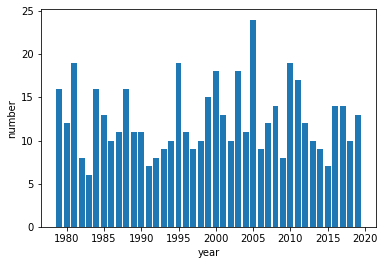

<Figure size 432x288 with 0 Axes>

In [13]:
TC_track_Atlantic=TC_track[TC_track['Ocean']=='Atlantic']
year=range(1979,2020)
num=[]
for i in year:
    a=TC_track_Atlantic[TC_track_Atlantic['Datetime'].dt.year == i]['Record identifier'].tolist()
    num.append(len(set(a)))

plt.figure()
plt.bar(year,num)
plt.ylabel('number')
plt.xlabel('year')
plt.figure();

#### Q2.3 (15%) Please perform a 'mean' test to see if the average number of TCs passing by 'Atlantic' increases from the period of 1979 - 1998 to the period of 1999-2019. 

#### Note that you should do a 'variance' test before the 'mean' test to check which mean test scenarios should be used.

In [14]:
rain1= num[:20]
n_samples1=len(rain1)
sample_mean1 = np.mean(rain1)
sample_stdev1 = np.std(rain1, ddof = 1)
rain2= num[20:]
n_samples2=len(rain2)
sample_mean2 = np.mean(rain2)
sample_stdev2 = np.std(rain2, ddof = 1)

In [15]:
F = sample_mean1 / sample_stdev2
df1 = n_samples1-1
df2 =n_samples2- 1
alpha = 0.01 #Or whatever you want your alpha to be.
p_value = stats.f.sf(F, df1, df2)
if p_value < alpha:
    print(f'We have to reject the null hypothesis H0, and the p-value is {p_value:.4f}')
    print('Using scenario 2,3,5')
else:
    print('We have no ground to reject H0')
    print('Using scenario 1,4')

We have no ground to reject H0
Using scenario 1,4


#### Scenario 1 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B=\sigma_A = \sigma$

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $Z = \frac{\bar{X}_{B}-\mu_B}{\sigma/\sqrt{n}}$
4. Distribution of test statistic $Z \sim N(0,1)$
5. Critical Region $\Re$: $Z>z_{1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $Z$ under $H_0$  & if $z_0>z_{1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(Z>z_0)$

In [16]:
n_samples1 = len(rain1)
n_samples2 = len(rain2)
f_A_mean_sample = np.mean(rain1)
mu_A = f_A_mean_sample
f_A_stdev_sample = np.std(rain1, ddof=1)
sigma = f_A_stdev_sample

f_B_mean_sample = np.mean(rain2)
mu_B = mu_A

#要加絕對值
Z = np.abs((f_B_mean_sample - mu_B)/(sigma/np.sqrt(n_samples2)))

alpha = 0.01
z_alpha = stats.norm.ppf(1-alpha)

print(f'test statistic Z = {Z:.4f}')
print(f'z_alpha = {z_alpha:.4f}')

if Z > z_alpha:
    p_value = 1-stats.norm.cdf(Z)
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print('We have no ground to reject H0')

test statistic Z = 1.9306
z_alpha = 2.3263
We have no ground to reject H0


#### Scenario 4 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B= \sigma_A = \sigma$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $t = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} {\widehat{S}_{X_A,X_B} \sqrt{\frac{1}{n_A} +\frac{1}{n_B} } } $
4. Distribution of test statistic: $T \sim t(n_A +n_B -2)$
5. Critical Region $\Re$: $T>t_{n_A+n_B-2,1-\alpha}$
6. Evaluate $T$ under $H_0$:if $t_0>t_{n_A+n_B-2,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(T>t_0)$

where $\widehat{S}_{X_A,X_B}^2 =  \frac{(n_A-1) \widehat{S}_{X_A}^2 +(n_B-1) \widehat{S}_{X_B}^2  }{n_A + n_B - 2}$

In [17]:
f_A_mean_sample = np.mean(rain1)
f_A_stdev_sample = np.std(rain1, ddof=1)

f_B_mean_sample = np.mean(rain2)
f_B_stdev_sample = np.std(rain2, ddof=1)

stdev_sample_A_B = np.sqrt((((n_samples1-1)*f_A_stdev_sample*f_A_stdev_sample) + ((n_samples2-1)*f_B_stdev_sample*f_B_stdev_sample))/(n_samples1+n_samples2-2))

T = np.abs((f_A_mean_sample - f_B_mean_sample))/(stdev_sample_A_B*np.sqrt(1/n_samples1+1/n_samples2))

df = n_samples2+n_samples1-2

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

p_value = 1-stats.t.cdf(T,df)

if T > t_alpha:
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')

test statistic T = 1.2706
t_alpha = 2.4258
We have no ground to reject H0, and the p-value is 0.1057


### Q3. (40%) Identifying those _hotspot_ states prone to be impacted by TCs passing by 'East Pacific' Ocean, and perfoming structural analysis on rainfall data of a given state for a given TC event.

#### Q3.1 (2%) Identify those TC tracks passing by 'East Pacific'

In [18]:
TC_track_Eastern_pacific=TC_track[TC_track['Ocean']=='Eastern pacific']
TC_track_Eastern_pacific


,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
9252,7777,Eastern pacific,EP011979,1979-05-31 18:00:00,ANDRES,3.222902e+06,-96022.348908,25,-999
9253,7778,Eastern pacific,EP011979,1979-06-01 00:00:00,ANDRES,3.145096e+06,-99360.806490,30,-999
9254,7779,Eastern pacific,EP011979,1979-06-01 06:00:00,ANDRES,3.067274e+06,-102319.471709,30,-999
9255,7780,Eastern pacific,EP011979,1979-06-01 12:00:00,ANDRES,2.988404e+06,-71150.925130,30,-999
9256,7781,Eastern pacific,EP011979,1979-06-01 18:00:00,ANDRES,2.942449e+06,-16279.988755,30,-999
...,...,...,...,...,...,...,...,...,...
21081,30191,Eastern pacific,EP212019,2019-11-17 06:00:00,TWENTYONE,2.478249e+06,246044.466724,25,1007
21082,30192,Eastern pacific,EP212019,2019-11-17 12:00:00,TWENTYONE,2.402122e+06,246336.409813,25,1007
21083,30193,Eastern pacific,EP212019,2019-11-17 18:00:00,TWENTYONE,2.325872e+06,235851.495187,25,1007
21084,30194,Eastern pacific,EP212019,2019-11-18 00:00:00,TWENTYONE,2.260578e+06,236716.545007,25,1007


#### Q3.2 (10%) Calculate the 'minimum' distance between each TC and each gauges, and export the calculation result to a csv file named _tc-tracks_MX-station_distance_min.csv_. 

#### The format of the csv file is as follow:


TC_ID,00001001,00001003,00001004,00001005,00001006...

EP011979,min_distance,min_distance,min_distance,min_distance,...

EP021979,min_distance,min_distance,min_distance,min_distance,...
...

In [19]:
IDss= gauge['ID'].tolist()
IDs=[]
for i in IDss:
    if i not in IDs:
        IDs.append('%08d'%i)

TC_IDs=[]
TC_IDss=TC_track_Eastern_pacific['Record identifier'].tolist()
for i in TC_IDss:
    if i not in TC_IDs:
        TC_IDs.append(i)

In [20]:
x=gauge['X'].tolist()
y=gauge['Y'].tolist()

result=pd.DataFrame()
for i in range(len(TC_IDs)):
    TC_track_Eastern_pacific_ID=TC_track_Eastern_pacific[TC_track_Eastern_pacific['Record identifier']==TC_IDs[i]]
    kx=TC_track_Eastern_pacific_ID['X'].tolist()
    ky=TC_track_Eastern_pacific_ID['Y'].tolist()
    distance=[]
    for j in range(len(IDs)):
        d= ((kx[0]-x[j])**2+(ky[0]-y[j])**2)**0.5/1000
        for k in range(len(kx)):
            temp_d=((kx[k]-x[j])**2+(ky[k]-y[j])**2)**0.5/1000
            if temp_d<d:
                d= temp_d
        distance.append(d) 
    result=result.append(pd.DataFrame([distance], columns=IDs, index=[TC_IDs[i]]))
result.index.name = 'TC_ID'
result       
        

,00001001,00001003,00001004,00001005,00001006,00001007,00001008,00001009,00001010,00001011,...,00032180,00032181,00032182,00032183,00032184,00032186,00032187,00032188,00032189,00032191
TC_ID,,,,,,,,,,,,,,,,,,,,,
EP011979,361.055810,344.718521,380.146161,350.273542,393.400275,369.165318,402.741195,353.691515,379.853152,344.616924,...,336.916432,299.258002,292.557462,315.098083,312.217714,452.998776,477.923218,421.354801,371.251316,564.147802
EP021979,1375.119990,1378.059155,1392.044757,1367.190493,1401.433948,1387.274570,1414.551342,1386.748942,1409.113584,1375.492463,...,1384.212173,1342.193185,1334.769297,1372.562046,1362.565374,1466.755426,1463.757700,1411.776831,1430.138086,1623.948679
EP031979,538.439080,525.134331,557.457758,528.012141,570.210676,547.442634,580.412515,534.152535,560.040932,524.678978,...,518.667247,480.494939,473.663654,496.768260,494.045842,631.673521,652.019588,595.177187,552.344419,735.479575
EP041979,1258.193814,1250.802096,1276.708270,1248.591335,1288.296304,1268.637447,1299.899934,1259.831622,1284.868952,1249.615541,...,1247.971624,1208.376390,1201.285431,1227.915978,1223.848857,1352.384030,1363.131921,1307.300050,1284.061301,1476.212573
EP051979,1706.193854,1676.006822,1724.275422,1694.875376,1738.443191,1710.274540,1744.011661,1683.740385,1709.492458,1678.421577,...,1651.817216,1627.993256,1623.502902,1615.525992,1627.478682,1786.158808,1826.701044,1773.285750,1654.045882,1799.600916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EP152019,382.588107,345.335287,398.471519,371.767661,412.379542,383.223812,414.861220,351.863820,375.845802,349.005138,...,315.598619,300.085084,297.452878,277.143818,293.030076,450.669068,498.742836,449.248677,312.282145,450.065452
EP162019,323.989778,287.520456,341.370525,312.752766,355.110105,325.969476,356.911634,293.694080,317.104475,291.477975,...,256.503697,243.527090,241.485285,217.587305,234.597334,390.215679,440.598127,389.043930,237.981631,322.170643
EP192019,276.950664,252.091047,295.563382,265.663820,309.582225,282.483608,316.621255,260.659794,287.198272,253.287068,...,237.227618,204.184338,198.433094,210.417250,211.865283,363.291511,397.396173,342.900984,264.680388,455.659028


In [21]:
fn_data_out = "./tc-tracks_MX-station_distance_min.csv"
result.to_csv(fn_data_out)

#### Q3.2 (10%) For each TC, please find the closest gauge (that is, the gauge with the shorest 'minimum' distance to a given TC) and identify the corresponding State this gauge belonging to. Finally, please count the number of  the closest gauges for all TCs passing by 'East Pacific' ocean for each State and export the counts to a csv filen named _tc-rg-counts_ep_MX.csv_.

#### The format of the output csv is as follow:

State,Count

BAJA CALIFORNIA,8

BAJA CALIFORNIA SUR,65

...

In [22]:
result_list = result.values.tolist()
nums=[]
for i in result_list:
    d=i[0]
    num=0
    for j in range(len(IDs)):
        if i[j]<d:
            d=i[j]
            num=j
    nums.append(num)
        
Statess= gauge['State'].tolist()
States=[]
for i in nums:
    States.append(Statess[i])

State=[]
count=[]
for i in States:
    for j in range(len(State)):
        if i==State[j]:
            count[j][0]+=1
    if i not in State:
        State.append(i)
        count.append([1])   
    

In [23]:

result_state=pd.DataFrame()
result_state=result_state.append(pd.DataFrame(count, columns=['Count'], index=State))
result_state.index.name = 'State'
result_state      
        

,Count
State,
COLIMA,434
GUERRERO,24
OAXACA,30
NAYARIT,7
BAJA CALIFORNIA SUR,65
DURANGO,5
SINALOA,14
MICHOACAN DE OCAMPO,26
BAJA CALIFORNIA,8


#### Q3.3 (5%) From the counts, you shall be able to find that one of the hotspot states is named 'SINALOA'. Please import rainfall data for those gauges belonging to 'SINALOA' state only from the _MX_SAT-RG_data.csv_ file, and calculate rainfall sum for these gauges for a TC event passing by 'East Pacific' Ocean, named 'JULIETTE' (the Record identifier is EP112001). 

In [24]:
sinaloa_id_short=gauge[gauge['State']=='SINALOA']['ID'].tolist()
sinaloa_id=[]
for i in sinaloa_id_short:
    sinaloa_id.append('%08d'%i)
    
fn_data = "/Users/lintingxuan/Final/Files/MX_SAT-RG_data.csv"
# read csv file, a dataframe will be created to store data
temp = pd.read_csv(fn_data)
df=pd.DataFrame()
df['date']=temp['date'].tolist()
for i in temp.columns:
    if i in sinaloa_id:
        df[i]=temp[i].tolist()
TC_track_Juliette=TC_track[TC_track['Record identifier']=='EP112001']
y_start,m_start,d_start=TC_track_Juliette['Datetime'].dt.year.iloc[0],TC_track_Juliette['Datetime'].dt.month.iloc[0],TC_track_Juliette['Datetime'].dt.day.iloc[0]
y_end,m_end,d_end=TC_track_Juliette['Datetime'].dt.year.iloc[len(TC_track_Juliette)-1],TC_track_Juliette['Datetime'].dt.month.iloc[len(TC_track_Juliette)-1],TC_track_Juliette['Datetime'].dt.day.iloc[len(TC_track_Juliette)-1]
df_Juliette=pd.DataFrame()
rain_indate=[]
boolean=False
temp=df.values.tolist()
for i in temp:
    if i[0]=="%d/%02d/%02d"%(y_start,m_start,d_start):
        boolean=True
    if boolean:
        rain_indate.append(i[1:])
    if i[0]=="%d/%02d/%02d"%(y_end,m_end,d_end):
        break
rain_sum=[0]*(len(rain_indate[0]))

for i in range(len(rain_indate)):
    for j in range(len(rain_indate[0])):
        rain_sum[j]+=rain_indate[i][j]
result_state=pd.DataFrame([rain_sum], columns=df.columns[1:].tolist())
result_state 

,00025001,00025002,00025003,00025004,00025005,00025006,00025007,00025008,00025009,00025010,...,00025180,00025181,00025183,00025184,00025185,00025186,00025188,00025190,00025191,00025192
0,52.221355,71.810235,109.408925,118.007165,63.510055,44.067108,74.736127,131.579514,157.327593,50.823693,...,125.62956,76.705907,41.397412,68.637504,110.325444,68.838144,70.953687,67.051686,73.392272,125.192615


#### Q3.4 (8%) Please perform structural analsys on the rainfall sum values for these gauges for the TC event 'JULIETTE' (the Record identifier is EP112001). This can be done by computing empirical variogram of the rainfall sums collected from the gauges and fitting the variogram. You may want to try several variogram models to the find the most suitable one. 

#### Please plot the empirical and the fitting variogram into a single chart, and print out the variogram model you decide to use and the resulting parameters of this variogram model.

In [25]:
place_id=df.columns[1:].tolist()
place_x=[]
place_y=[]
for i in place_id:
    for j in range(len(IDs)):
        if IDs[j]==i:
            place_x.append(gauge.iloc[j]['X'])
            place_y.append(gauge.iloc[j]['Y'])
            break

#rain_sum

In [26]:
bin_center, gamma = gs.vario_estimate((place_x, place_y), rain_sum)
print(bin_center)
print(gamma)

[  6530.33649967  19591.00949901  32651.68249835  45712.35549769
  58773.02849703  71833.70149637  84894.37449571  97955.04749505
 111015.72049439 124076.39349373 137137.06649307 150197.7394924
 163258.41249174 176319.08549108 189379.75849042 202440.43148976]
[ 108.55205556  664.47378639 1184.56892965 1759.66445024 1941.40761412
 2270.61211419 2121.76573946 2167.05676573 2191.38896397 1921.79622312
 1930.23966932 2479.43641725 2368.92245298 2346.936672   2186.86489984
 2229.19009913]


/var/folders/ht/dzk15s191ms_dh69dbbw6bjw0000gn/T/ipykernel_85076/3188378728.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Exponential(dim=2, var=2.28e+03, len_scale=3.26e+04, nugget=0.0)
Stable(dim=2, var=2.2e+03, len_scale=3.67e+04, nugget=0.0, alpha=1.63)
Gaussian(dim=2, var=2.19e+03, len_scale=3.18e+04, nugget=0.0)


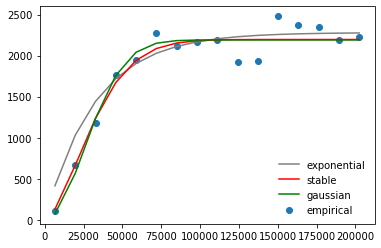

In [27]:
fit_model_stable = gs.Stable(dim=2)
fit_model_stable.fit_variogram(bin_center, gamma, nugget=False)

fit_model_exp = gs.Exponential(dim=2)
fit_model_exp.fit_variogram(bin_center, gamma, nugget=False)

fit_model_gauss = gs.Gaussian(dim=2)
fit_model_gauss.fit_variogram(bin_center, gamma, nugget=False)

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(bin_center, fit_model_exp.variogram(bin_center), color='grey', label='exponential')
ax.plot(bin_center, fit_model_stable.variogram(bin_center), color='red', label='stable')
ax.plot(bin_center, fit_model_gauss.variogram(bin_center), color='green', label='gaussian')


ax.scatter(bin_center, gamma, label='empirical')

plt.legend(frameon=False)

print(fit_model_exp)
print(fit_model_stable)
print(fit_model_gauss)

Gaussian(dim=2, var=2.19e+03, len_scale=3.18e+04, nugget=0.0)


/var/folders/ht/dzk15s191ms_dh69dbbw6bjw0000gn/T/ipykernel_85076/4172754938.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


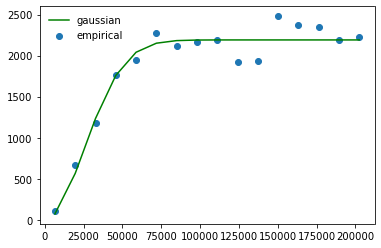

In [28]:

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(bin_center, fit_model_gauss.variogram(bin_center), color='green', label='gaussian')


ax.scatter(bin_center, gamma, label='empirical')

plt.legend(frameon=False)

print(fit_model_gauss)

#### Q3.5 (5%) Please use ordinary kriging to generate a 'structured' field based upon the structure analysis. The domain of the field is:

#### X axis ranges from 1150000 to 1650000 and the interval is 5000 (in metres)
#### Y axis ranges from 1750000 to 2150000 and the interval is 5000 (in metres)

/opt/anaconda3/lib/python3.8/site-packages/gstools/field/plot.py:368: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'Field 2D structured: (100, 80)'}, xlabel='$x$', ylabel='$y$'>

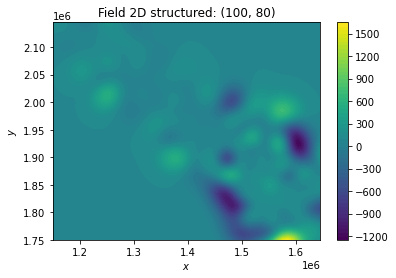

In [29]:
# grid definition for output field
kriges = gs.krige.Ordinary(fit_model_gauss, [place_x,place_y], rain_sum)
x=range(1150000,1650000,5000)
y=range(1750000,2150000,5000)
kriges.structured([x,y])
kriges.plot()



### Q4. (10% bonus) download satellite data and make some plots. 

#### Please download IMERG daily rainfall data files for the TC 'JULIETTE' (the Record identifier is EP112001), and calculate rainfall sum at each pixel and plot the resulting field of rainfall sums.  

#### Hints:

#####  You can do this with the .bash script provided in this course or your own way. But you will face a challenge -- You need to figure out the domain that is required to download the script. That is, you need to the update the following variables in the .bash script.

lat_l=7

lat_t=27

lon_l=-100

lon_t=-80

##### Please note that the values for the above variables are Lattitude and Longitude in degree (the so called WGS 84 coordinate system: https://epsg.io/4326), but in the data files used above, all the coordinates provided are in X and Y in metres (in the local Mexico coordinate system: Mexico ITRF 2008 https://epsg.io/6372). So you have to do a transformation of the coordinate systems to convert the following domain to Latitude and Longitude before running the .bash script. 

##### X axis ranges from 1150000 to 1650000 and the interval is 5000 (in metres)
##### Y axis ranges from 1750000 to 2150000 and the interval is 5000 (in metres)

##### To do the transformation, you may refer to this example: https://pyproj4.github.io/pyproj/stable/advanced_examples.html


### Good luck with the assignment!